In [2]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import DataReader
from datetime import datetime

In [3]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOGL','MSFT','AMZN']


In [4]:
#Setting the end date to today
end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

In [5]:
#Using Yahoo Finance to grab the stock data
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end) #The globals method sets the stock name to a global variable


In [6]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-21,128.000000,125.209999,127.820000,125.430000,79295400.0,124.717461
2021-05-24,127.940002,125.940002,126.010002,127.099998,63092900.0,126.377975
2021-05-25,128.320007,126.320000,127.820000,126.900002,72009500.0,126.179115
2021-05-26,127.389999,126.419998,126.959999,126.849998,56575900.0,126.129387
2021-05-27,127.639999,125.080002,126.440002,125.279999,94625600.0,124.568314


In [7]:
#Basic stats for Apple's Stock
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,156.484151,153.021106,154.702767,154.803360,8.825329e+07,154.311028
std,14.899541,14.200021,14.570333,14.561943,2.683300e+07,14.684473
min,124.849998,123.129997,124.070000,123.540001,4.100000e+07,122.838203
25%,146.949997,144.110001,145.470001,145.639999,6.912200e+07,145.031403
50%,154.630005,150.380005,151.889999,152.059998,8.328130e+07,151.870819
75%,169.679993,165.500000,167.479996,166.559998,1.024043e+08,166.315643
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [8]:
#Some basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-05-21 to 2022-05-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

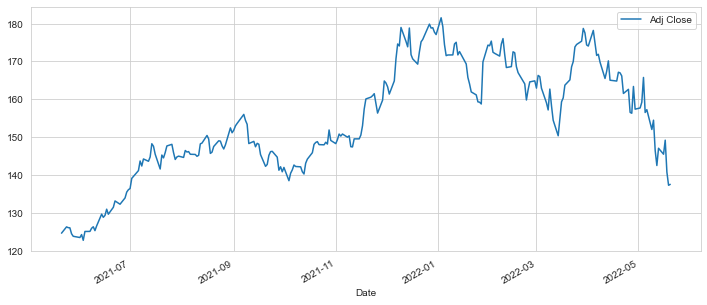

In [9]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

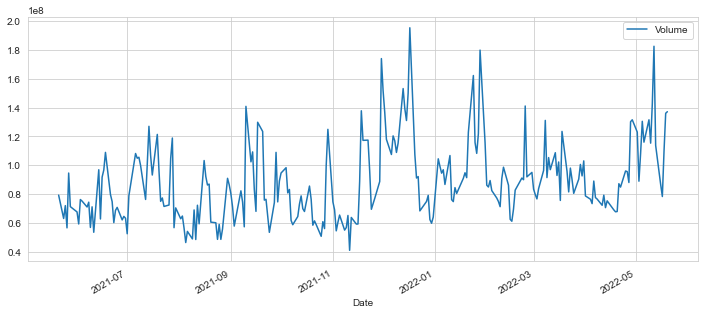

In [10]:
#Plotting the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

In [11]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2022-05-16,147.520004,144.179993,145.550003,145.539993,86643800.0,145.539993,152.712244,157.154407,163.094894
2022-05-17,149.770004,146.679993,148.860001,149.240005,78336300.0,149.240005,151.711642,156.258687,162.898369
2022-05-18,147.360001,139.899994,146.850006,140.820007,109742900.0,140.820007,149.216000,154.950455,162.570588
2022-05-19,141.660004,136.600006,139.880005,137.350006,136095600.0,137.350006,147.297000,153.509163,162.063370
2022-05-20,140.699997,132.610001,139.089996,137.589996,137194600.0,137.589996,145.328000,152.311031,161.649421


<AxesSubplot:xlabel='Date'>

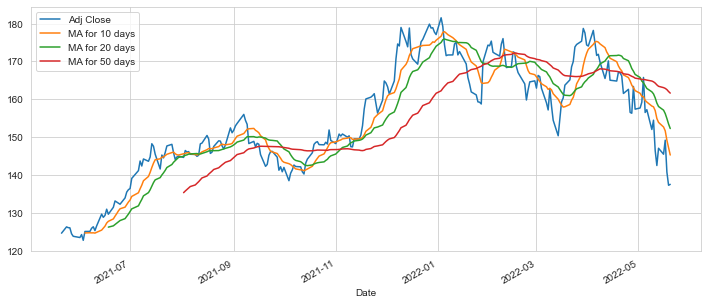

In [12]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))


In [13]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()


In [14]:
AAPL['Daily Return'].tail()

Date
2022-05-16   -0.010672
2022-05-17    0.025423
2022-05-18   -0.056419
2022-05-19   -0.024641
2022-05-20    0.001747
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

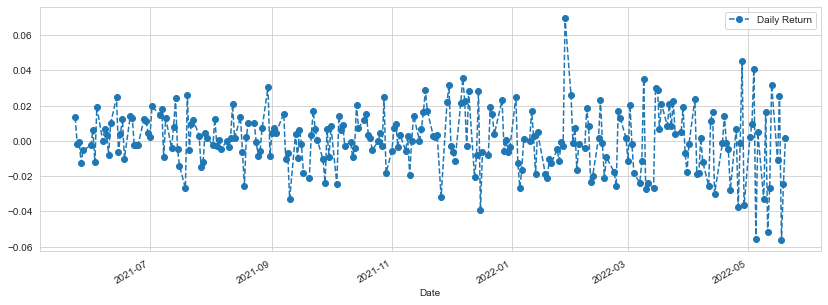

In [15]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')


<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

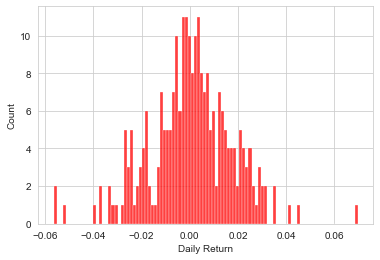

In [16]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='red')

In [17]:
#Reading just the 'Adj Close' column this time
close_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']


In [18]:
close_df.tail()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2022-05-16,145.539993,2288.899902,260.892365,2216.209961
2022-05-17,149.240005,2329.459961,266.200012,2307.370117
2022-05-18,140.820007,2237.989990,254.080002,2142.250000
2022-05-19,137.350006,2207.679932,253.139999,2146.379883
2022-05-20,137.589996,2178.159912,252.559998,2151.820068


In [19]:
rets_df = close_df.pct_change()

In [20]:
rets_df.tail()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2022-05-16,-0.010672,-0.013835,0.001455,-0.019853
2022-05-17,0.025423,0.017720,0.020344,0.041133
2022-05-18,-0.056419,-0.039267,-0.045530,-0.071562
2022-05-19,-0.024641,-0.013543,-0.003700,0.001928
2022-05-20,0.001747,-0.013372,-0.002291,0.002535


C:\Users\yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


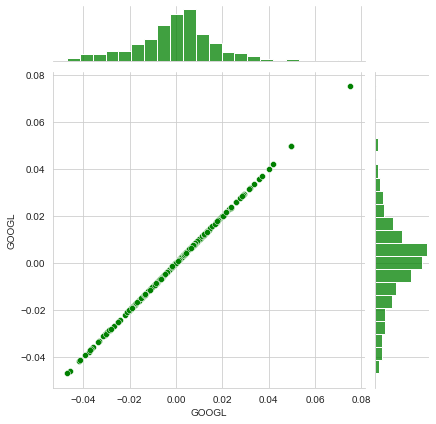

In [21]:
sns.jointplot('GOOGL','GOOGL',rets_df,kind='scatter',color='green')

C:\Users\yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


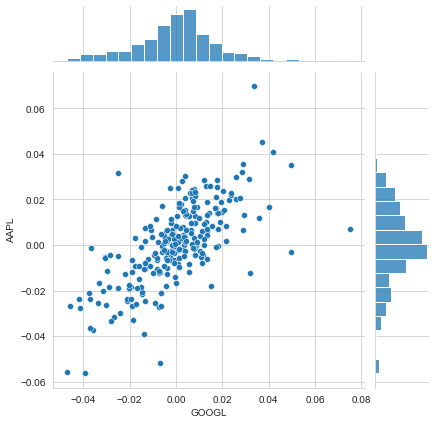

In [22]:
sns.jointplot('GOOGL','AAPL',rets_df,kind='scatter')


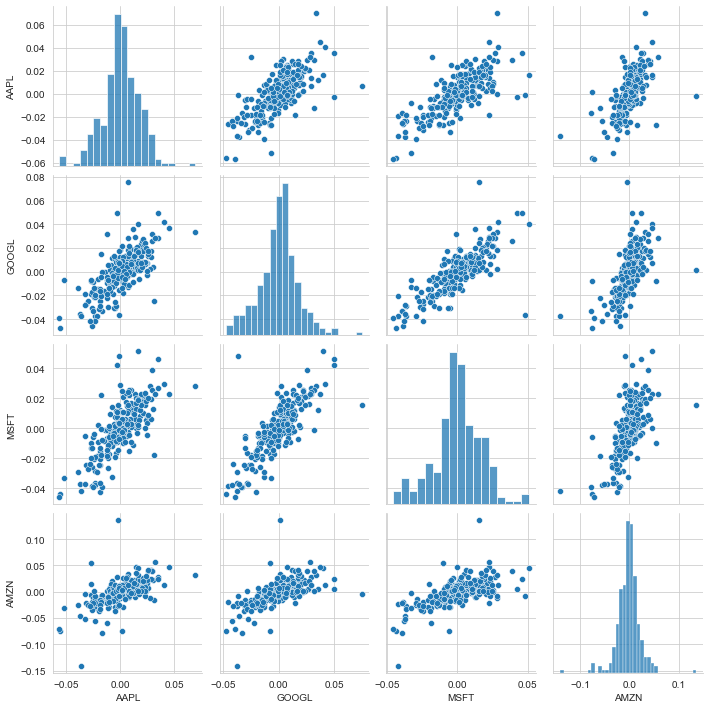

In [23]:
sns.pairplot(rets_df.dropna())

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

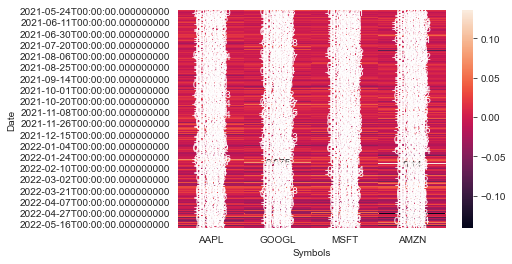

In [24]:
sns.heatmap(rets_df.dropna(),annot=True)

In [25]:
rets = rets_df.dropna()

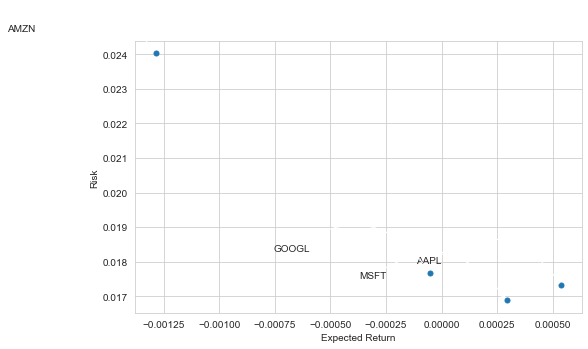

In [26]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))
    


<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

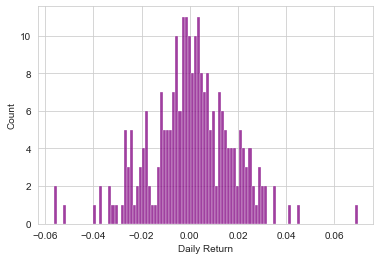

In [27]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='purple')


In [28]:
rets.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2021-05-24,0.013314,0.029166,0.022882,0.013084
2021-05-25,-0.001573,0.000775,0.003748,0.004333
2021-05-26,-0.000394,0.007381,-0.000914,0.001875
2021-05-27,-0.012377,-0.007407,-0.008668,-0.010734
2021-05-28,-0.005348,-0.002467,0.001484,-0.002180


In [29]:
#Using Pandas built in qualtile method
rets['AAPL'].quantile(0.05)

-0.026903254983407416

In [30]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOGL']

sigma = rets.std()['GOOGL']

In [31]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [35]:
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-21,2318.889893,2289.300049,2317.409912,2294.129883,2031600,2294.129883
2021-05-24,2365.550049,2311.959961,2314.889893,2361.040039,1591600,2361.040039
2021-05-25,2384.000000,2355.000000,2372.000000,2362.870117,1122000,2362.870117
2021-05-26,2388.989990,2366.459961,2366.520020,2380.310059,1078600,2380.310059
2021-05-27,2389.050049,2356.260010,2389.050049,2362.679932,1761200,2362.679932


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

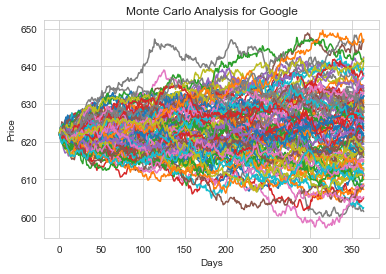

In [36]:
start_price = 622.049 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [37]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

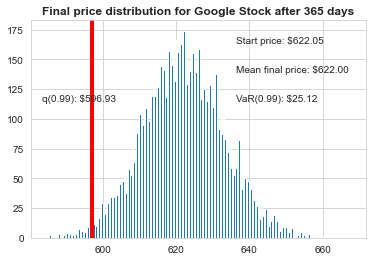

In [38]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')
